# Bank Marketing Prediction

## 1. Introducción

El conjunto de datos que abordaremos en este proyecto proviene de la investigación realizada por Sérgio Moro, Paulo Cortez y Paulo Rita en 2014, titulada "A Data-Driven Approach to Predict the Success of Bank Telemarketing". Este estudio se centra en el ámbito del marketing bancario, específicamente en la telemarketing de bancos, y busca prever el éxito de estas campañas utilizando un enfoque basado en datos. El dataset se basa en el conjunto de datos "Bank Marketing" de UCI, pero se enriqueció con la adición de cinco nuevos atributos sociales y económicos.

### Campos del Dataset

**datos del cliente bancario:**

+ 1 - age: Edad (numérico)
+ 2 - job: tipo de trabajo (categórico: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
+ 3 - marital: estado civil (categórico: "divorced","married","single","unknown"; nota: "divorced" significa divorciado o viudo)
+ 4 - educación (categórico: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
+ 5 - default: ¿tiene crédito en mora? (categórico: "no", "yes", "unknown")
+ 6 - housing: ¿tiene préstamo hipotecario? (categórico: "no", "yes", "unknown")
+ 7 - loan: ¿tiene préstamo personal? (categórico: "no", "yes", "unknown")

**relacionado con el último contacto de la campaña actual:**

+ 8 - contact: tipo de comunicación de contacto (categórico: "cellular","telephone")
+ 9 - month: último mes de contacto del año (categórico: "jan", "feb", "mar", ..., "nov", "dec")
+ 10 - day_of_week: último día de contacto de la semana (categórico: "mon","tue","wed","thu","fri")
+ 11 - duration: duración del último contacto, en segundos (numérico). **Nota importante:** este atributo afecta significativamente al objetivo de salida (por ejemplo, si la duración=0, entonces y="no"). Sin embargo, la duración no se conoce antes de realizar una llamada. Además, después del final de la llamada, y es obviamente conocido. Por lo tanto, este dato solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

**otros atributos:**

+ 12 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
+ 13 - pdays: número de días transcurridos después de que el cliente fue contactado por última vez en una campaña anterior (numérico; 999 significa que el cliente no fue contactado anteriormente)
+ 14 - previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
+ 15 - poutcome: resultado de la campaña de marketing anterior (categórico: "failure","nonexistent","success")

**atributos de contexto social y económico**

+ 16 - emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
+ 17 - cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
+ 18 - cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
+ 19 - euribor3m: tasa euribor a 3 meses - indicador diario (numérico) **Nota importante:** Euribor es el tipo de interés aplicado a las operaciones entre bancos de Europa. Es decir, el porcentaje que paga como tasa un banco cuando otro le presta dinero. Realmente no es un solo tipo de interés, sino la media a la que se prestan los bancos europeos el dinero a un plazo determinado.
+ 20 - nr.employed: número de empleados - indicador trimestral (numérico)

**Variable de salida (objetivo deseado):**

+ 21 - y - ¿el cliente ha suscrito un depósito a plazo? (binario: "yes", "no")

**Valores Faltantes de Atributos:** Hay varios valores faltantes en algunos atributos categóricos, todos codificados con la etiqueta "desconocido". Estos valores faltantes pueden tratarse como una posible etiqueta de clase o utilizando técnicas de eliminación o imputación.

## 2. Objetivo del Proyecto

El objetivo principal de este proyecto es desarrollar un modelo predictivo que pueda determinar si un cliente suscribirá un depósito a plazo bancario. Se plantea abordar esta tarea mediante técnicas de clasificación, donde la variable objetivo es binaria ("sí" o "no"). Se explorarán las relaciones entre las variables disponibles en el conjunto de datos y se aplicarán técnicas de aprendizaje supervisado para lograr la predicción deseada. Las hipótesis iniciales incluyen la expectativa de que ciertos atributos, como la duración del contacto, tendrán un impacto significativo en la decisión del cliente de suscribir un depósito.

## 3. Hipótesis

**3.1.** Se mantiene la expectativa de que ciertos tipos de trabajo ('tjob'), estados civiles ('estado civil') y estado civil ('marital'), en ciertos rangos de edad ('age') seguirán teniendo impacto en la probabilidad de suscripción.

**3.2.** Se espera determinar una relación entre los productos financieros y sus estados ('default', 'housing' y 'loan'), con la predicción del la suscripción del depósito.

**3.3.** La influencia del tipo de comunicación de contacto ('contact'), el mes ('month') y el día de la semana ('day_of_week') en la probabilidad de suscripción se mantendrá, a pesar de la exclusión de 'duration'.

**3.4.** La influencia del número de días transcurridos después de que el cliente fue contactado por última vez en una campaña anterior ('pdays'), el número de contactos realizados antes de esta campaña y para este cliente ('previous') y del resultado de la campaña de marketing anterior ('poutcome') en las suscripciones actuales seguirá siendo una consideración importante.

**3.5.** Se espera que los atributos relacionados con el contexto socioeconómico ('emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' y 'nr.employed') sigan influyendo en las decisiones de suscripción.

## 4. Contexto Comercial

El análisis de este conjunto de datos tiene relevancia en el contexto comercial, ya que puede proporcionar información valiosa para mejorar las estrategias de telemarketing bancario. Al comprender los factores que influyen en la decisión del cliente de suscribir un depósito, los bancos pueden adaptar y optimizar sus campañas, ahorrando recursos y aumentando la efectividad de sus esfuerzos de marketing. Además, la capacidad de prever el éxito de una campaña puede tener un impacto positivo en la rentabilidad de las instituciones financieras al dirigir sus recursos de manera más eficiente.

## 5. EDA

In [1]:
# Importar las bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Cargar los datos
url_dataset = "https://raw.githubusercontent.com/JoaZ94/Bank-Marketing-Classification-Model/main/Dataset%20Bank%20Marketing/bank-additional-full.csv"

df = pd.read_csv(url_dataset, sep = ';')

# ver la información del df
display(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Verifica las dimensiones del conjunto de datos
print(df.shape)

(41188, 21)


In [4]:
# Verifica los tipos de datos de cada columna
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [5]:
# Ver la información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Ver las caracteristicas del df
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Es completamente lógico que el datase no tenga datos nulos, ya que estos son tratados como 'unknown', en el dataset, por lo tanto, con base a este valor, vamos a averiguar cuanto datos faltantes hay realmente:

In [8]:
# Identifica columnas con valores "unknown"
unk_cols = []

for col in df.columns:
    if 'unknown' in df[col].unique():
        unk_cols.append(col)

print(unk_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [9]:
# Calcula el porcentaje de valores perdidos para esas columnas
for col in unk_cols:
    n_missing = df[df[col] == 'unknown'][col].count()
    pct_missing = n_missing / df.shape[0] * 100
    print(f'{col} - {pct_missing:.2f}% valores perdidos')

job - 0.80% valores perdidos
marital - 0.19% valores perdidos
education - 4.20% valores perdidos
default - 20.87% valores perdidos
housing - 2.40% valores perdidos
loan - 2.40% valores perdidos


Encontramos una **alerta** para la columna **'defualt',** ya que tiene un **20.87% de valores desconocidos (unknown)**

In [10]:
# Analiza las filas con valores desconocidos
unknown_rows = df[df[unk_cols].isin(['unknown']).any(1)]
print(f'Número de filas con algún valor desconocido: {len(unknown_rows)}')

Número de filas con algún valor desconocido: 10700


<ipython-input-10-d3a57c22e7ca>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  unknown_rows = df[df[unk_cols].isin(['unknown']).any(1)]


### Sección Hipótesis 1

Se mantiene la expectativa de que ciertos tipos de trabajo ('tjob'), estados civiles ('estado civil') y estado civil ('marital'), en ciertos rangos de edad ('age') seguirán teniendo impacto en la probabilidad de suscripción.

In [11]:
# Se crean el grupo de varibales que responden a las hipotesis

list_info_cliente = ['age', 'job', 'marital', 'education']
list_info_crediticia = ['default', 'housing', 'loan']
list_info_campania = ['contact', 'month', 'day_of_week'] # Se descarta 'duration'
list_info_camp_ant = ['campaign', 'pdays', 'previous', 'poutcome']
list_info_socioecon = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

A continuación, se conoce la distribución de los valores categoricos de los tipos de empleos **(job),** del estado civil **(marital)** y de la educación **(education).**

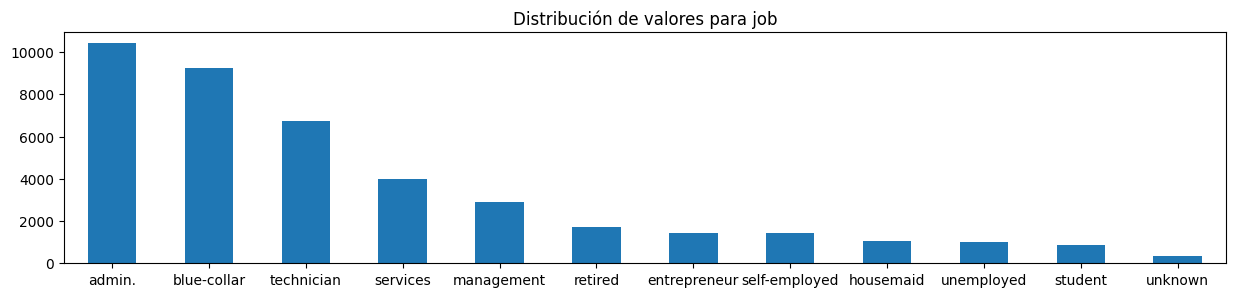

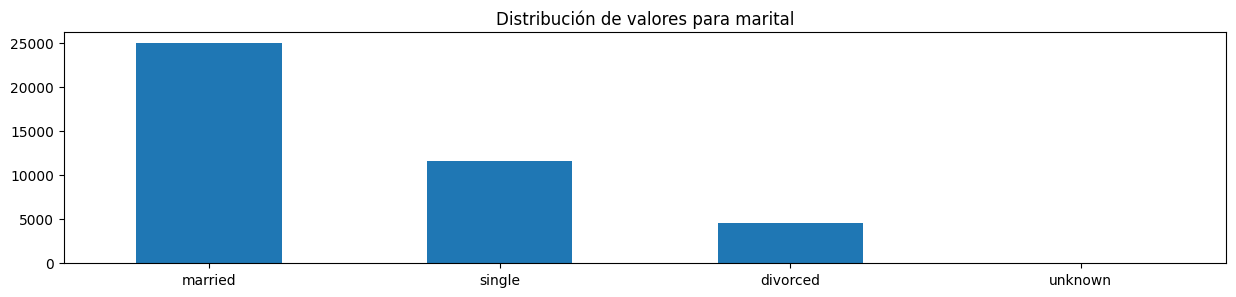

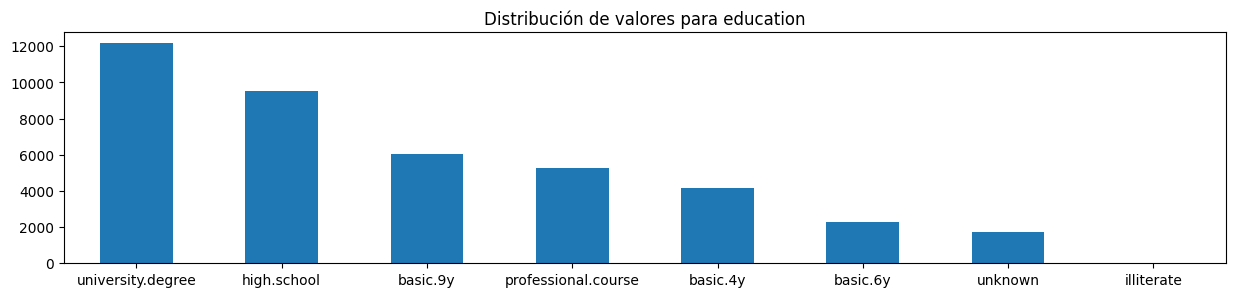

In [12]:
# Visualiza la distribución de valores conocidos vs. desconocidos de  lod datos categóricos del
# cliente ('job', 'marital' y 'education') para la hipótesis 1
for col in unk_cols[0:3]:
    counts = df[col].value_counts()
    plt.figure(figsize=(15,3))
    counts.plot.bar()
    plt.title(f'Distribución de valores para {col}')
    plt.xticks(rotation=0) # Evita que las etiquetas se sobrepongan
    plt.show()

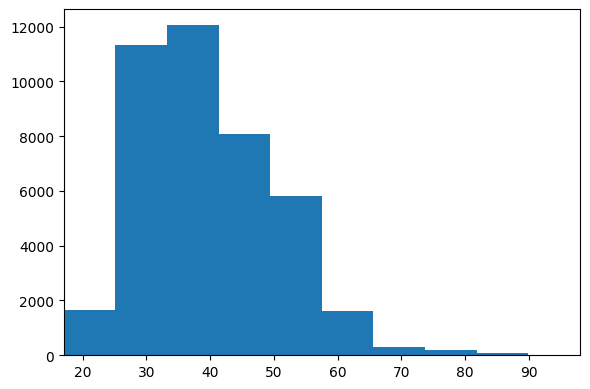

In [13]:
# Histogramas de la variable numérica de la hipótesis 1 'age'
fig, ax = plt.subplots(figsize=(6, 4))

counts, bins, patches = plt.hist(df[list_info_cliente[0]], bins=10)

ax.set_xlim(bins[0], bins[-1])

plt.tight_layout()
plt.show()

En el gráfico anterior, se evidencia una **concentración de usuarios** de las campañas de Marketing, **entre los 25 y los 55 años**, aproximadamente.

A continuación, se explora la posibilidad de una relación entre la edad y la suscripción del Depósito.

Text(0.5, 1.0, 'Edad vs Suscripción a Depósito')

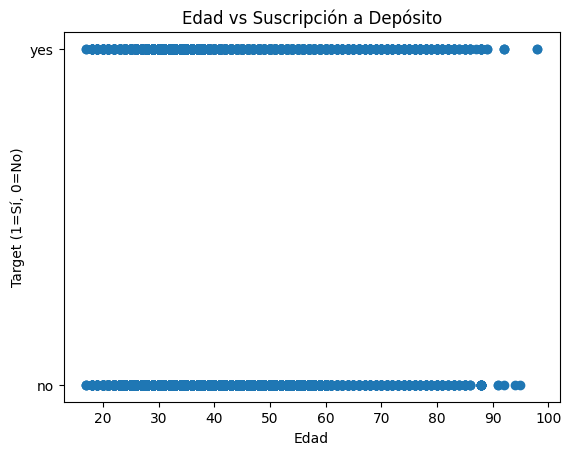

In [14]:
# Edad vs Target
plt.scatter(df['age'], df['y'])
plt.xlabel('Edad')
plt.ylabel('Target (1=Sí, 0=No)')
plt.title('Edad vs Suscripción a Depósito')

Con el anternior gráfico, no se evidencia una relación entre la Suscripción al Deposito y la Edad.



<Axes: >

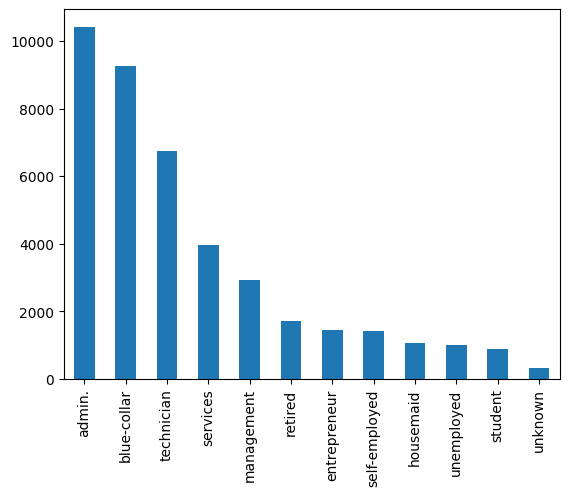

In [34]:
# Distribución de la variable categórica 'job'
dist_job = df['job'].value_counts()
dist_job.plot.bar()

<Axes: xlabel='y', ylabel='age'>

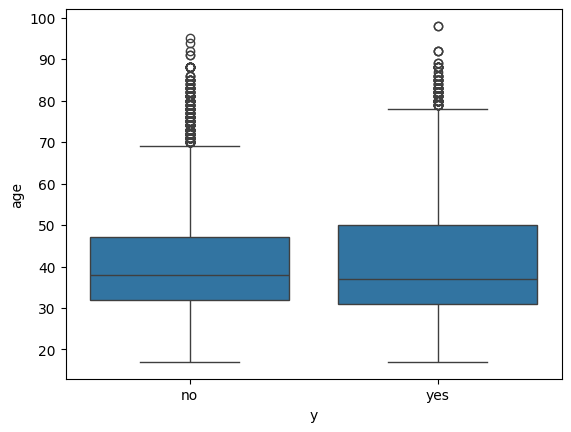

In [40]:
# Otras visualizaciones
sns.boxplot(x='y', y='age', data=df)

<ipython-input-15-1eec10e75a62>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


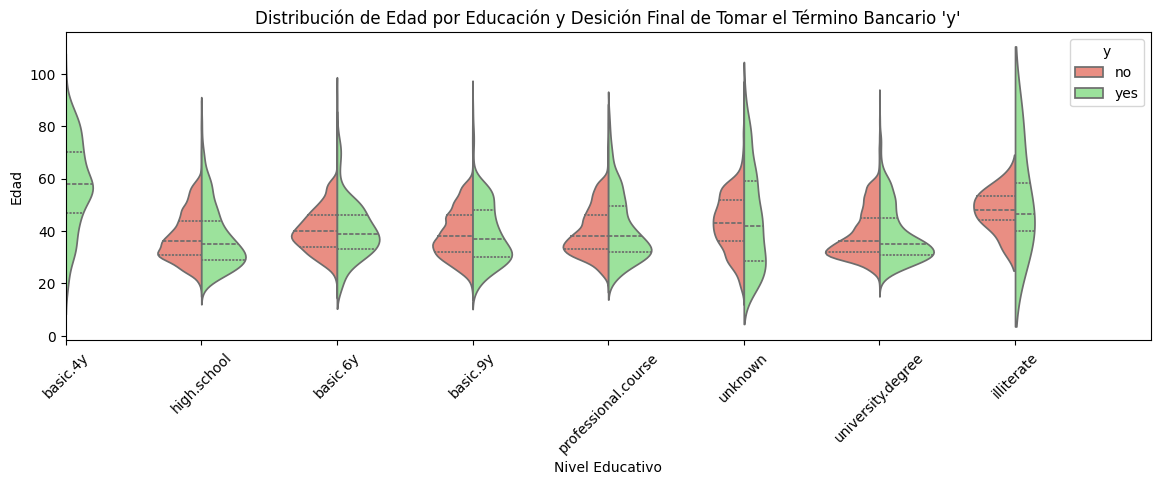

In [15]:
plt.figure(figsize=(14,4))

# Crear diccionario de colores (Mapeo)
hue_colors = {'no': 'salmon', 'yes': 'lightgreen'}

# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="education", y="age", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Edad por Educación y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Nivel Educativo")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

Del gráfico de Distribución de Edad por Educación y Desición Final de Tomar el Término Bancario 'y', se evidencia que **todos los usuarios con educación 'basic.4y', han suscrito el Deposito Bancario.**

<ipython-input-16-32ec6405e8e7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


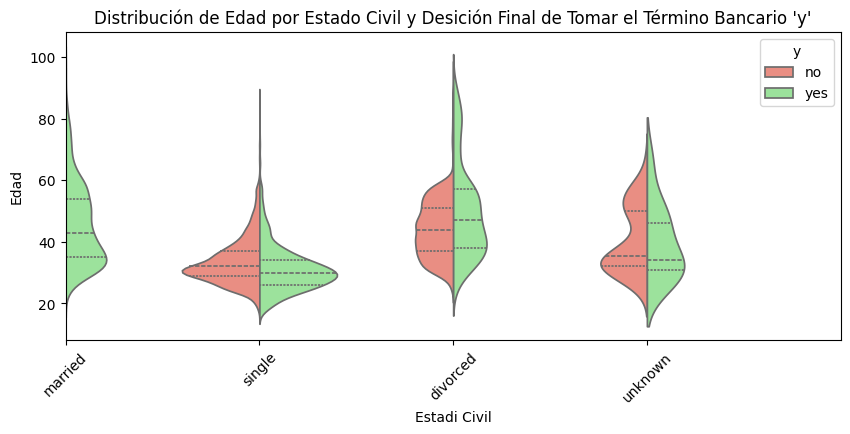

In [16]:
plt.figure(figsize=(10,4))
# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="marital", y="age", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Edad por Estado Civil y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Estadi Civil")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

Del gráfico de Distribución de Edad por Estado Civil y Desición Final de Tomar el Término Bancario 'y', se evidencia que **todos los usuarios con estado civil 'married', han suscrito el Deposito Bancario.**

<ipython-input-17-77fd1f59b98a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


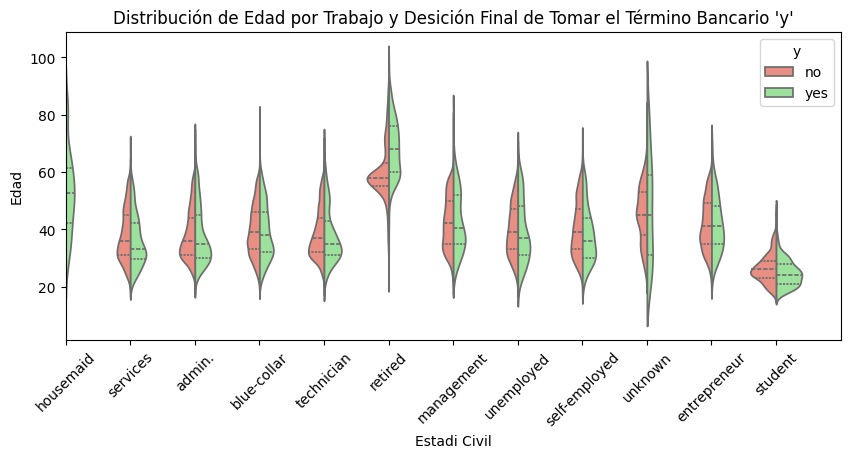

In [17]:
plt.figure(figsize=(10,4))
# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="job", y="age", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Edad por Trabajo y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Estadi Civil")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

Del gráfico de Distribución de Edad por Trabajo y Desición Final de Tomar el Término Bancario 'y', se evidencia que **todos los usuarios con trabajo 'housemaid', han suscrito el Deposito Bancario.**

### Sección Hipótesis 2

Se espera determinar una relación entre los productos financieros y sus estados ('default', 'housing' y 'loan'), con la predicción del la suscripción del depósito.

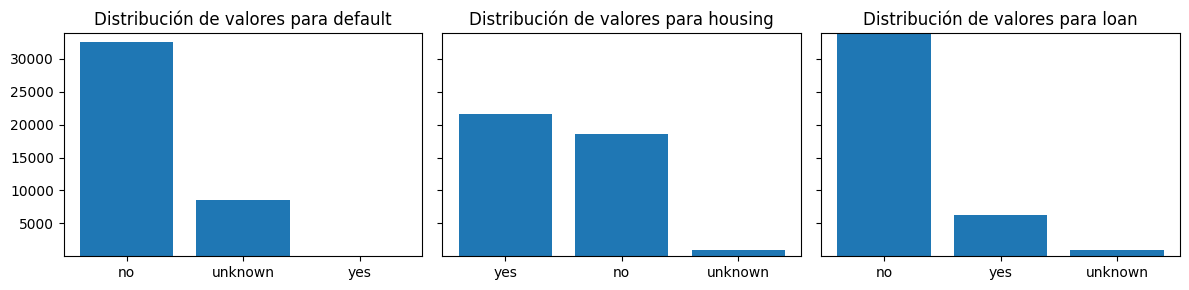

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12,3), sharey=True)

# Encuentra los límites compartidos para el eje y
y_min = min(df[col].value_counts().min() for col in unk_cols[3:6])
y_max = max(df[col].value_counts().max() for col in unk_cols[3:6])

for i, col in enumerate(unk_cols[3:6]):

  counts = df[col].value_counts()

  axs[i].bar(counts.index, counts.values)
  axs[i].set_title(f'Distribución de valores para {col}')
  axs[i].set_xticks(counts.index)
  axs[i].set_xticklabels(counts.index, rotation=0)

  # Fija los límites del eje y
  axs[i].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

**Se evidencia una cantidad significativa de datos desconocidos 'unknown' del campo 'default'. Además se evidencia que la mayoría de los datos del campo 'loan', son 'no'**

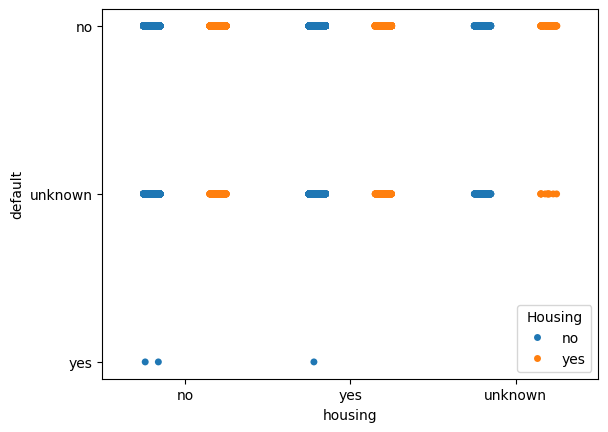

In [20]:
sns.stripplot(x="housing", y="default",
              data=df,
              hue='y',
              dodge=True, zorder=1)

plt.legend(title='Housing')
plt.show()

De acuerdo al gráfico anterior, se ve los usuarios con mora 'Default', no sucriben depósitos bancarios.

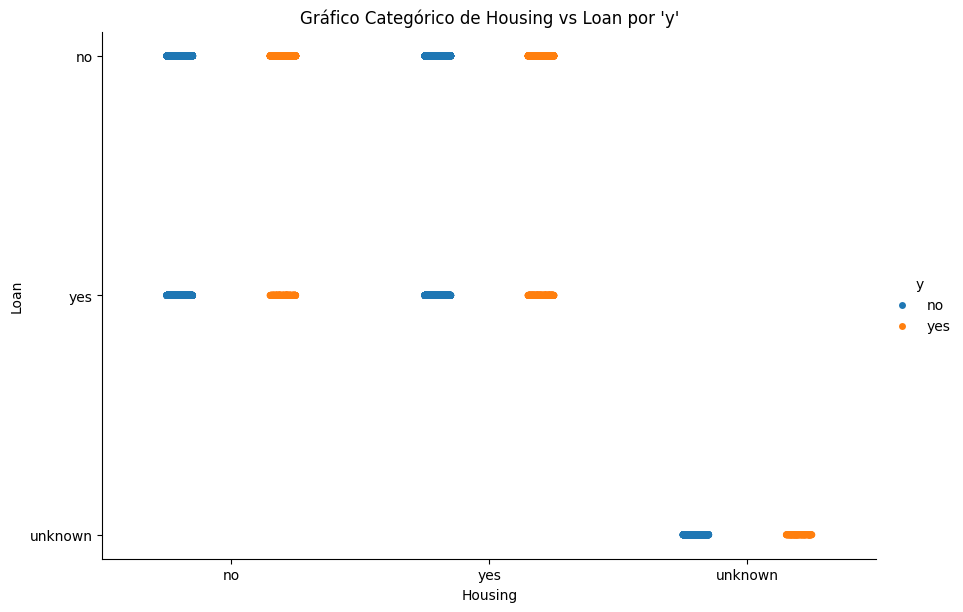

In [21]:
sns.catplot(data=df, kind="strip",
            x="housing", y="loan",
            hue='y', dodge=True,
            height=6, aspect=1.5)

plt.xlabel("Housing")
plt.ylabel("Loan")
plt.title("Gráfico Categórico de Housing vs Loan por 'y'")

plt.show()

### Sección Hipótesis 3

La influencia del tipo de comunicación de contacto ('contact'), el mes ('month') y el día de la semana ('day_of_week') en la probabilidad de suscripción se mantendrá, a pesar de la exclusión de 'duration'.

<ipython-input-22-22f1b6684f16>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs3 = plt.subplot(212)


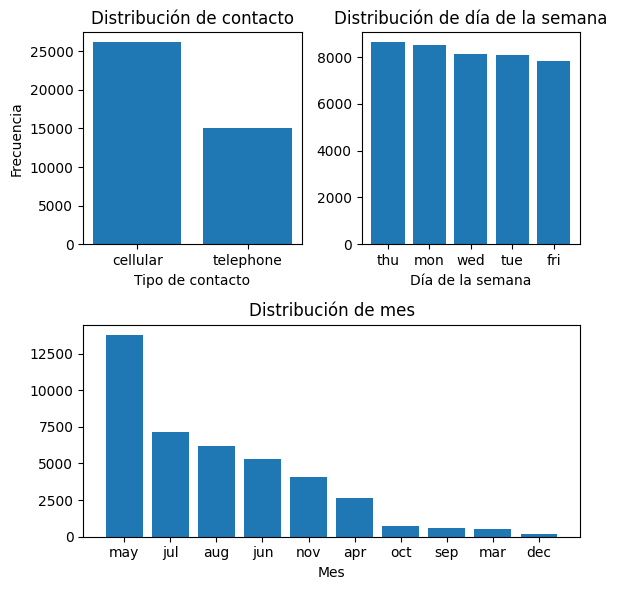

In [22]:
# Crear figura y axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

# Gráfico de contact
counts = df['contact'].value_counts()
axs1 = plt.subplot(221)
axs1.bar(counts.index, counts.values)
axs1.set_title('Distribución de contacto')
axs1.set_xlabel('Tipo de contacto')
axs1.set_ylabel('Frecuencia')

# Gráfico de day_of_week
counts = df['day_of_week'].value_counts()
axs2 = plt.subplot(222)
axs2.bar(counts.index, counts.values)
axs2.set_title('Distribución de día de la semana')
axs2.set_xlabel('Día de la semana')

# Gráfico de month
counts = df['month'].value_counts()
axs3 = plt.subplot(212)
axs3.bar(counts.index, counts.values)
axs3.set_title('Distribución de mes')
axs3.set_xlabel('Mes')

plt.tight_layout()
plt.show()

Se evidencia que en el mes de mayo, es donde más contactos de la campaña de marketing se realizan.

<ipython-input-23-7090c98657a9>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


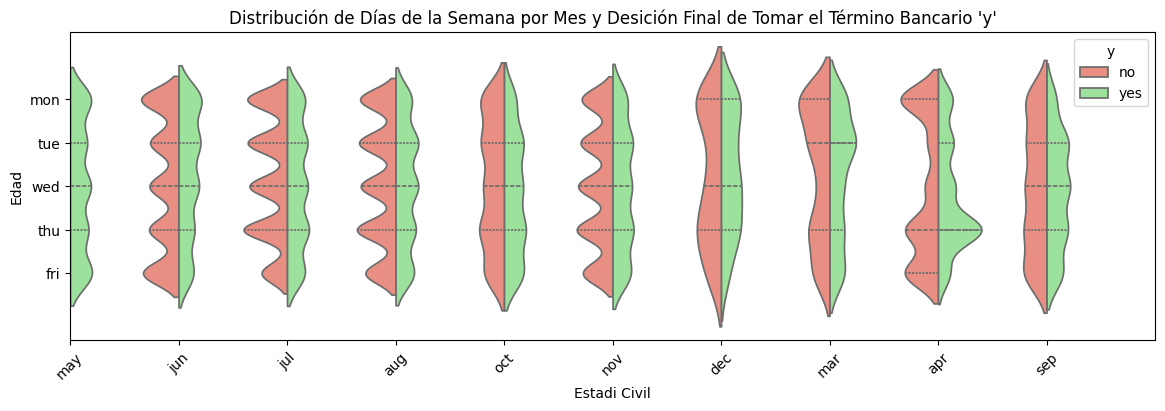

In [23]:
plt.figure(figsize=(14,4))
# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="month", y="day_of_week", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Días de la Semana por Mes y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Estadi Civil")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

Se evidencia que el mes de mayo, todas las comunicaciones resultaron en clientes que tomaron el Término Bancario. Además sí se tiene en cuenta el gráfico anterior, obtenemos un dato muy importante y es que en el mes con más contactos, se obtiene una aceptación total del término bancario.

<ipython-input-24-31d215a3e594>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


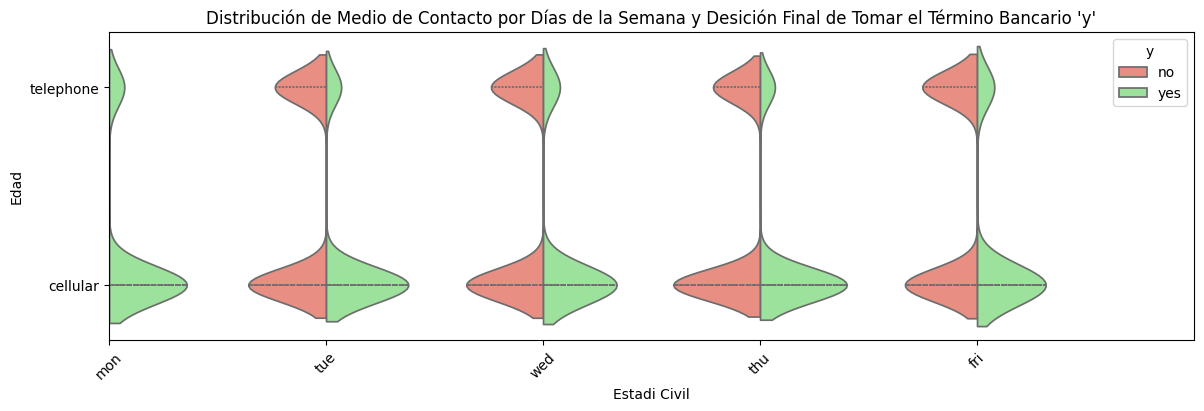

In [24]:
plt.figure(figsize=(14,4))
# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="day_of_week", y="contact", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Medio de Contacto por Días de la Semana y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Estadi Civil")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

De acuerdo al gráfico anterior, se puede concluir que las campañas por telefono no son eficientes para obtener clientes que tomen el término bancario. Además, los días lunes tiene una aceptación total, independientemente del medio de comunicación.

### Sección Hipótesis 4

La influencia del número de días transcurridos después de que el cliente fue contactado por última vez en una campaña anterior ('pdays'), el número de contactos realizados antes de esta campaña y para este cliente ('previous') y del resultado de la campaña de marketing anterior ('poutcome') en las suscripciones actuales seguirá siendo una consideración importante.

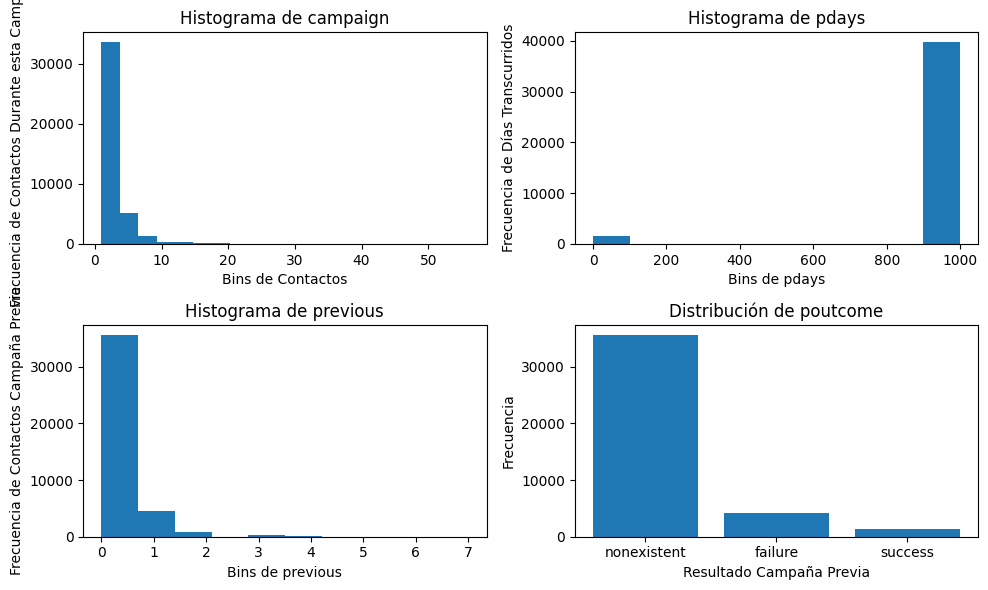

In [25]:
# Crear figura y axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Gráfico de campaign
axs1 = plt.subplot(221)
axs1.hist(df['campaign'], bins=20)
axs1.set_title('Histograma de campaign')
axs1.set_xlabel('Bins de Contactos')
axs1.set_ylabel('Frecuencia de Contactos Durante esta Campaña')

# Gráfico de day_of_week
axs2 = plt.subplot(222)
axs2.hist(df['pdays'])
axs2.set_title('Histograma de pdays')
axs2.set_xlabel('Bins de pdays')
axs2.set_ylabel('Frecuencia de Días Transcurridos')

# Gráfico de month
axs3 = plt.subplot(223)
axs3.hist(df['previous'])
axs3.set_title('Histograma de previous')
axs3.set_xlabel('Bins de previous')
axs3.set_ylabel('Frecuencia de Contactos Campaña Previa')

# Grafico de poutcome
counts = df['poutcome'].value_counts()
axs1 = plt.subplot(224)
axs1.bar(counts.index, counts.values)
axs1.set_title('Distribución de poutcome')
axs1.set_xlabel('Resultado Campaña Previa')
axs1.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

De acuerdo a la distribución de **poutcome**, se evidencia que el dataset no cuenta con suficiente información de los resultados de campañas previas, lo cual concuerda con el histograma de **pdays**, el cual tiene una disparidad fuerte en el bin que contiene el valor 999, que face referencia a que el cliente nunca fue contactado en la campaña previa.

Text(0, 0.5, 'Núm. Contactos Campaña Prev')

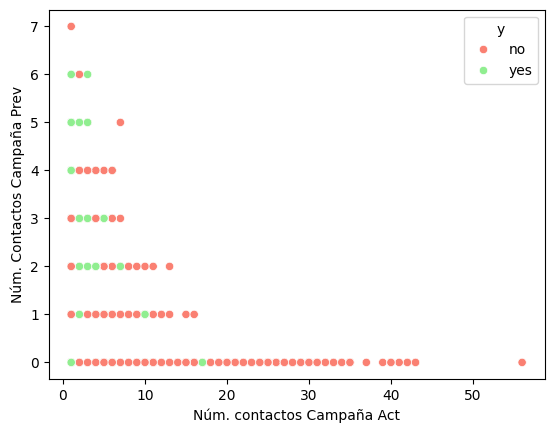

In [26]:
sns.scatterplot(data=df, x='campaign', y='previous', hue='y', palette=['salmon','lightgreen'])

plt.xlabel('Núm. contactos Campaña Act')
plt.ylabel('Núm. Contactos Campaña Prev')

Text(0, 0.5, 'Núm. Contactos Campaña Prev')

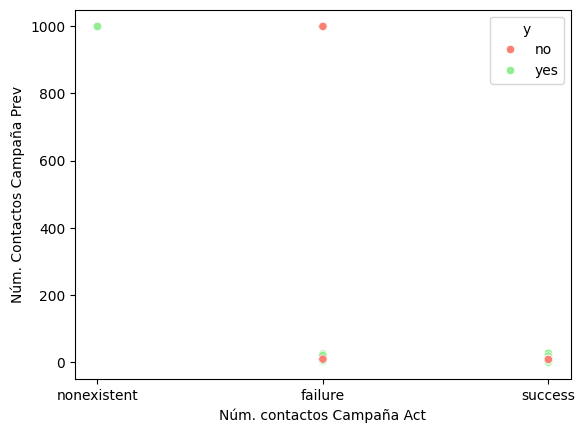

In [55]:
sns.scatterplot(data=df, x='poutcome', y='pdays', hue='y', palette=['salmon','lightgreen'])

plt.xlabel('Núm. contactos Campaña Act')
plt.ylabel('Núm. Contactos Campaña Prev')

Text(0.5, 1.0, 'Contactos en campaña vs Suscripción')

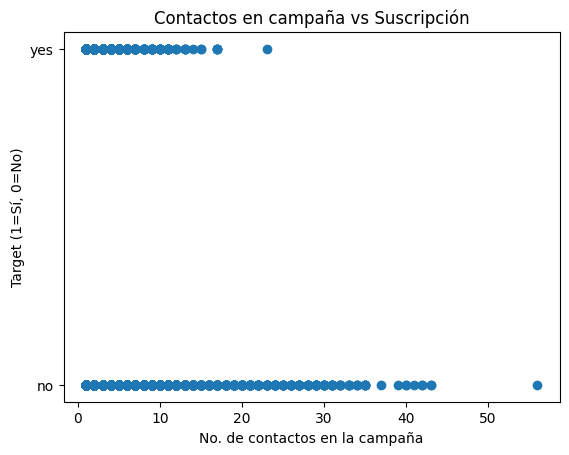

In [29]:
# Número de contactos en campaña vs Target
plt.scatter(df['campaign'], df['y'])
plt.xlabel('No. de contactos en la campaña')
plt.ylabel('Target (1=Sí, 0=No)')
plt.title('Contactos en campaña vs Suscripción')

<Axes: xlabel='y', ylabel='previous'>

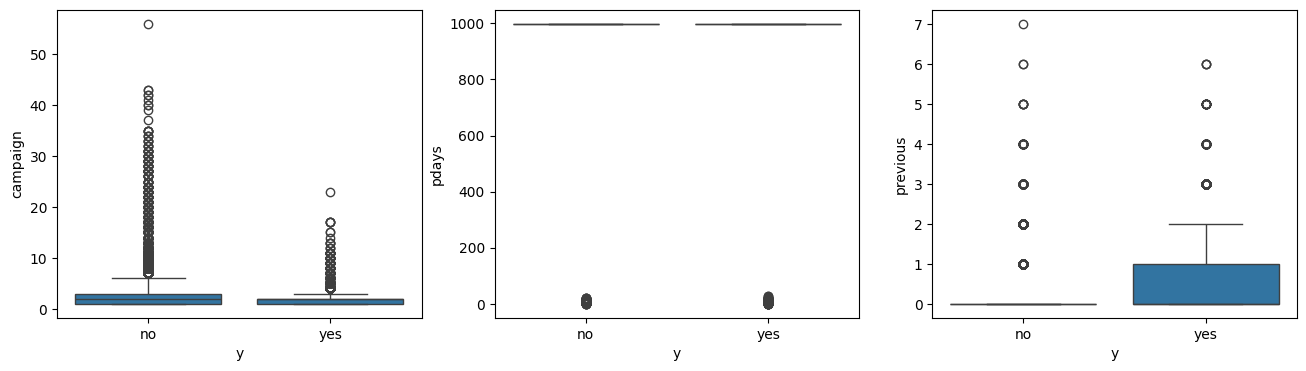

In [70]:
# Boxplots de variables numéricas por clase
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
sns.boxplot(x='y', y='campaign', data=df, ax=axs[0])
sns.boxplot(x='y', y='pdays', data=df, ax=axs[1])
sns.boxplot(x='y', y='previous', data=df, ax=axs[2])

### Sección Hipótesis 5

Se espera que los atributos relacionados con el contexto socioeconómico ('emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' y 'nr.employed') sigan influyendo en las decisiones de suscripción.

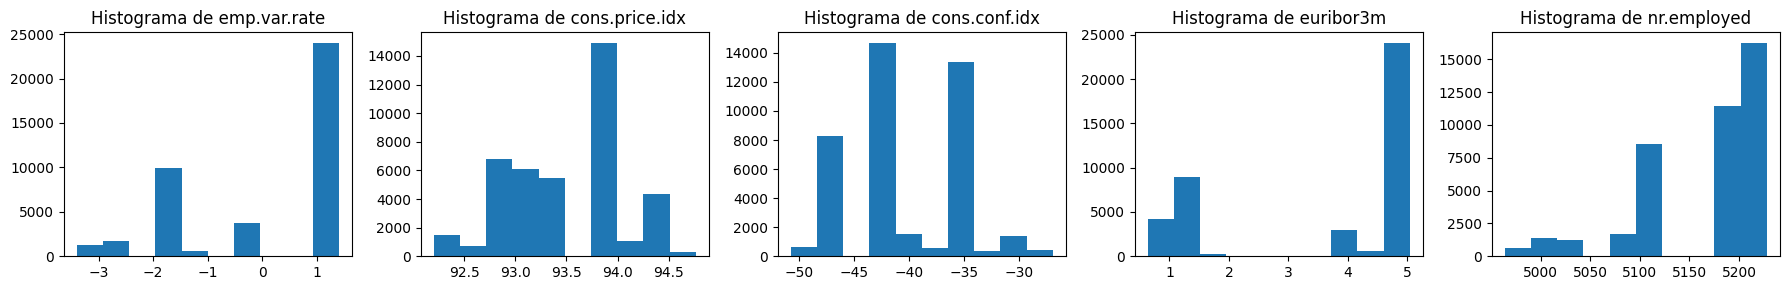

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(18,3))

for i, col in enumerate(list_info_socioecon):

  # Gráfica
  axs[i].hist(df[col])
  axs[i].set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Target (1=Sí, 0=No)')

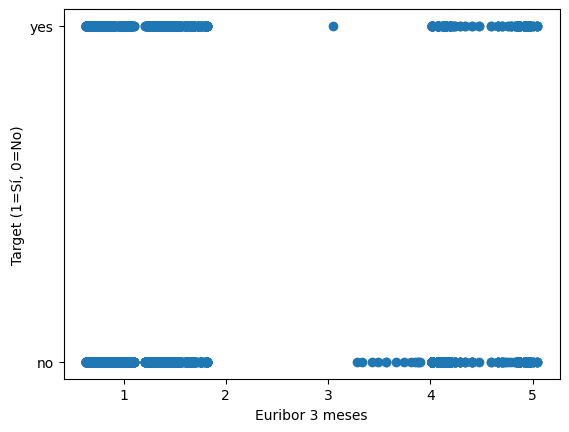

In [28]:
# Tasa interés vs Target
plt.scatter(df['euribor3m'], df['y'])
plt.xlabel('Euribor 3 meses')
plt.ylabel('Target (1=Sí, 0=No)')

<ipython-input-77-8ae8f09b5587>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


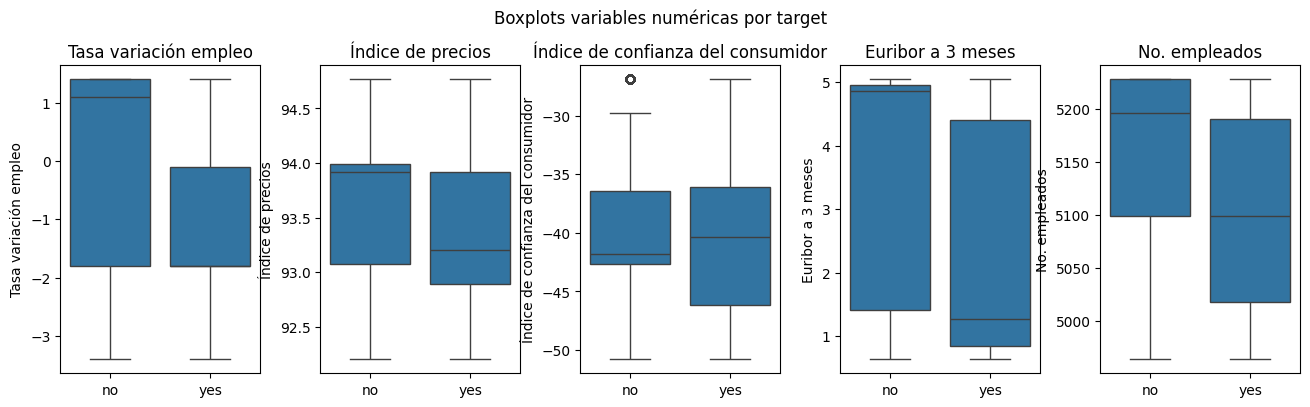

In [77]:
# Crear figura y axes
fig, axs = plt.subplots(ncols=5, figsize=(16, 4),
                        gridspec_kw={'wspace': 0.3})

# Dict para mapear nombres de columnas
col_map = {'emp.var.rate': 'Tasa variación empleo',
           'cons.price.idx': 'Índice de precios',
           'cons.conf.idx': 'Índice de confianza del consumidor',
           'euribor3m': 'Euribor a 3 meses',
           'nr.employed': 'No. empleados'}

# Iterar sobre columns y axes
for ax, col in zip(axs, col_map):

  sns.boxplot(x='y', y=col, data=df, ax=ax)

  ax.set_xlabel('')
  ax.set_ylabel(col_map[col])
  ax.set_title(col_map[col])

# Título principal
fig.suptitle('Boxplots variables numéricas por target', y=1.02)

# Ajustar espaciado externo
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Comprensión de los Datos y su Relación

no     36548
yes     4640
Name: y, dtype: int64


<Axes: >

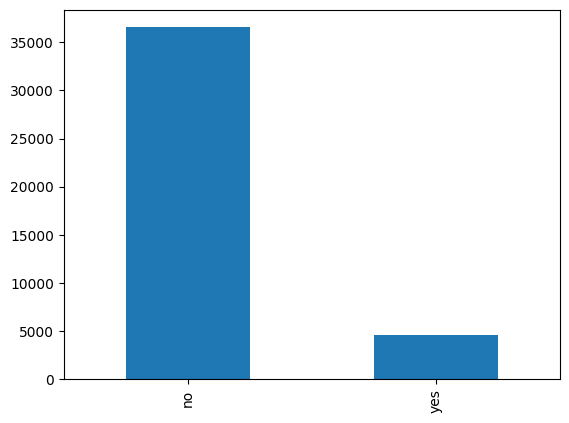

In [32]:
# Distribución de la variable objetivo
dist_var_salida = df['y'].value_counts()
print(dist_var_salida)
dist_var_salida.plot.bar()

In [33]:
# Distribuciones de variables categóricas
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print("-------------------------------")

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-------------------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-------------------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-------------------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
-------------------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
-------------------------------
no         33950
yes

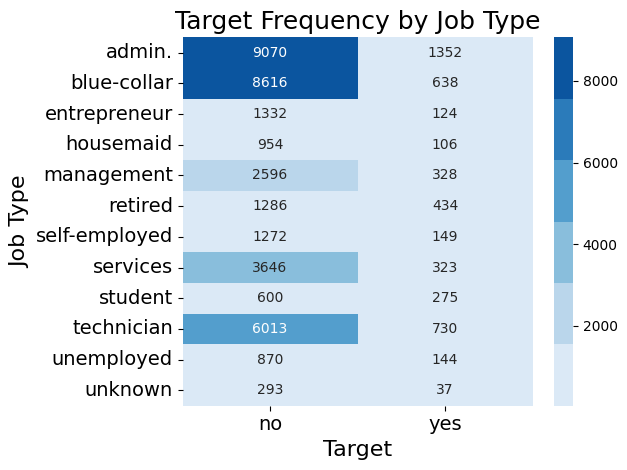

In [81]:
# Definir paleta de colores
palette = sns.color_palette('Blues')

# Generar crosstab
ct = pd.crosstab(df['job'], df['y'])

# Plot heatmap
ax = sns.heatmap(ct, annot=True, fmt='g', cmap=palette)

# Estilo de fuente para anotaciones
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=14)

# Etiquetas y título
ax.set_xlabel('Target', fontsize=16)
ax.set_ylabel('Job Type', fontsize=16)
ax.set_title('Target Frequency by Job Type', fontsize=18)

# Ajustar layout
plt.tight_layout()

<Axes: xlabel='contact', ylabel='count'>

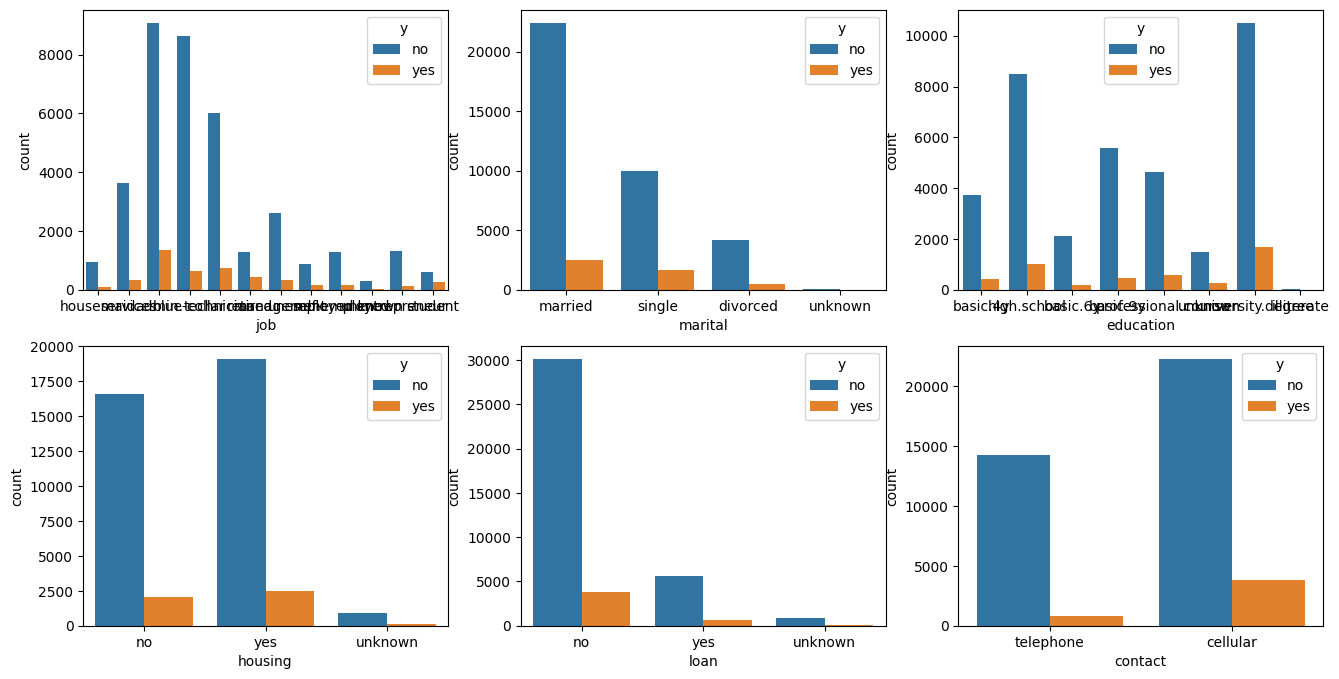

In [79]:
# Countplots de variables categóricas por clase
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
sns.countplot(x='job', hue='y', data=df, ax=axs[0,0])
sns.countplot(x='marital', hue='y', data=df, ax=axs[0,1])
sns.countplot(x='education', hue='y', data=df, ax=axs[0,2])
sns.countplot(x='housing', hue='y', data=df, ax=axs[1,0])
sns.countplot(x='loan', hue='y', data=df, ax=axs[1,1])
sns.countplot(x='contact', hue='y', data=df, ax=axs[1,2])


<ipython-input-84-153e423dafbe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

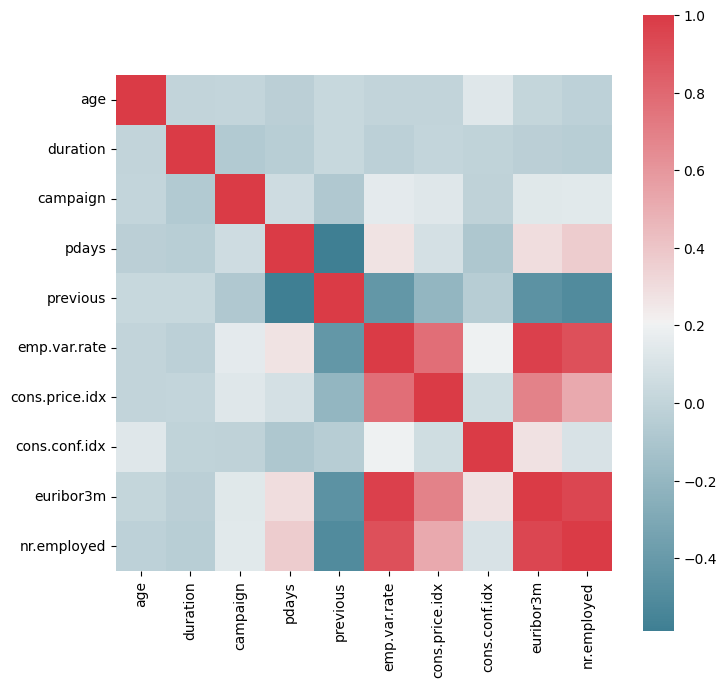

In [84]:
# Matriz de correlación
f, ax = plt.subplots(figsize=(8, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr),
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        square=True, ax=ax)

De acuerdo al gráfico anterior, se evidencian fuertes correlaciones entre el **euribor3m** y **nr.employed**, así como entre **euribor3m** y **emp.var.rate** y entre los campos **emp.var.rate** y **nr.employed**. Lo cual son varibales que están correlacionadas, ya que dependen de factores socioeconómicos similares.

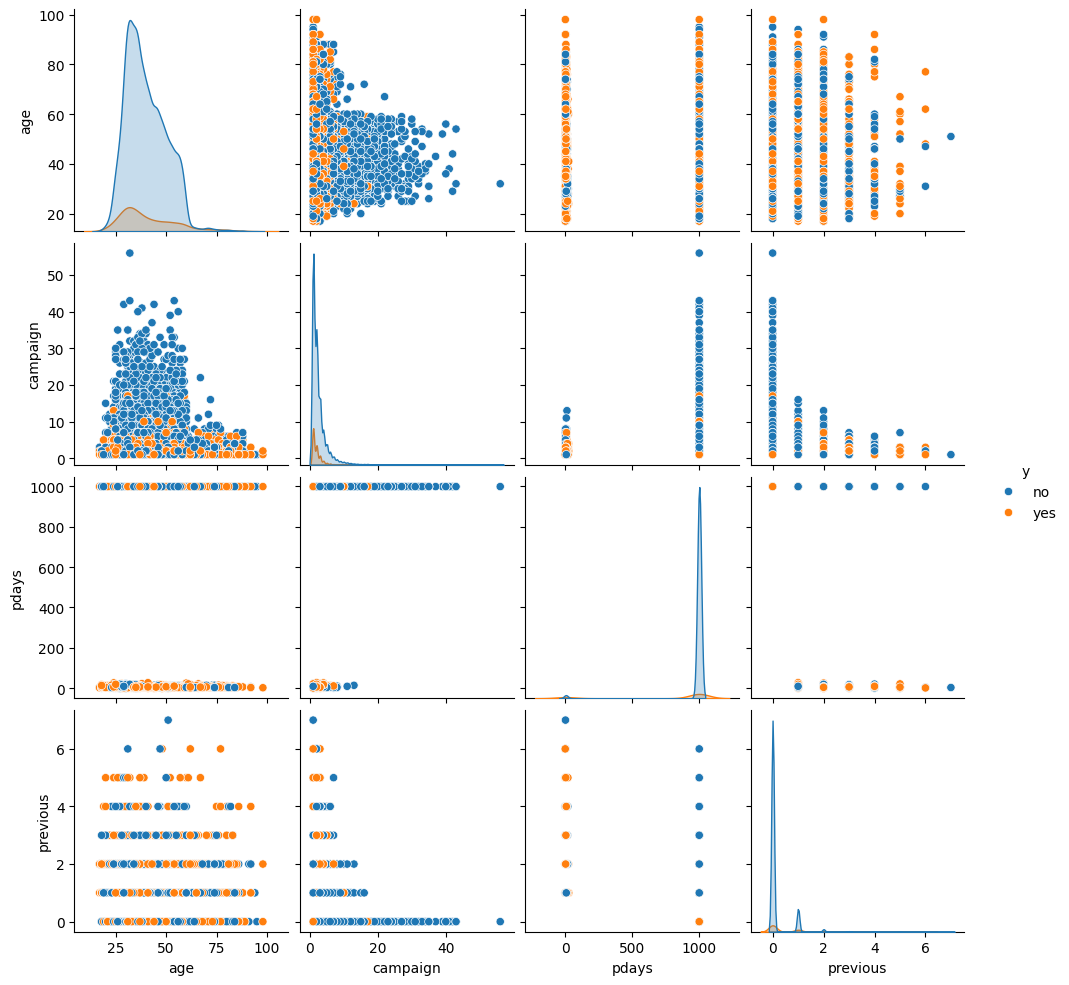

In [45]:
# Pairplots
sns.pairplot(df, hue='y', vars=['age', 'campaign', 'pdays', 'previous'])

<Axes: xlabel='education', ylabel='campaign'>

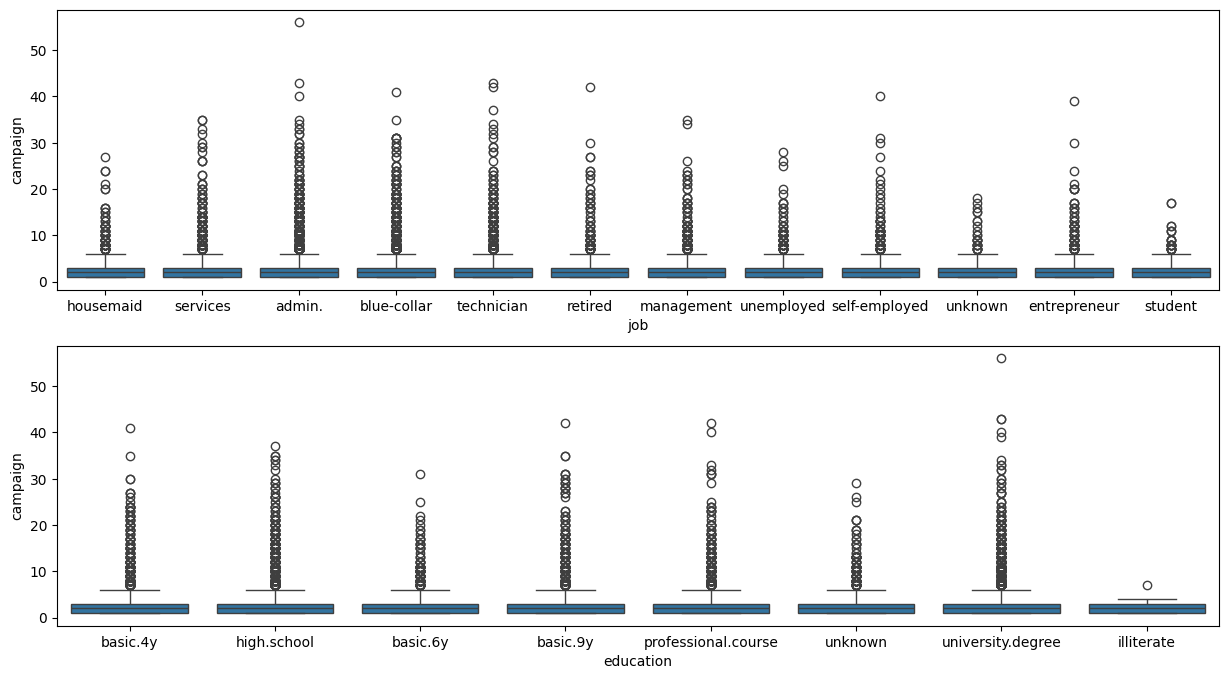

In [47]:
# Boxplots de campaign por educación y empleo
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
sns.boxplot(x='job', y='campaign', data=df, ax=ax1)
sns.boxplot(x='education', y='campaign', data=df, ax=ax2)

<Axes: xlabel='y', ylabel='campaign'>

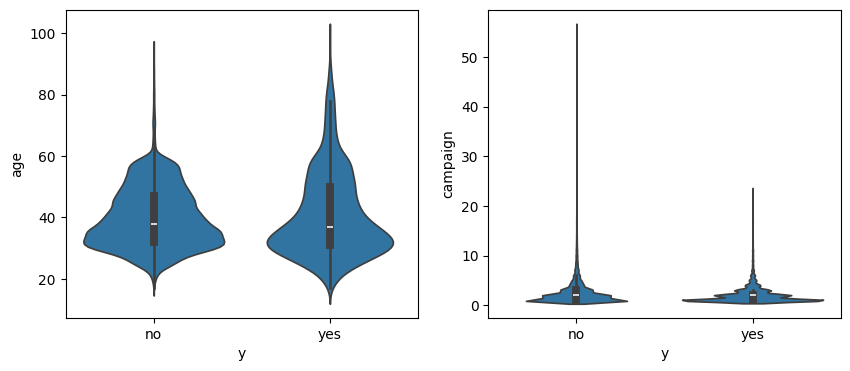

In [48]:
# Violin plots de variable objetivo vs edad y empleo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.violinplot(x='y', y='age', data=df, ax=ax1)
sns.violinplot(x='y', y='campaign', data=df, ax=ax2)

<Axes: xlabel='education', ylabel='campaign'>

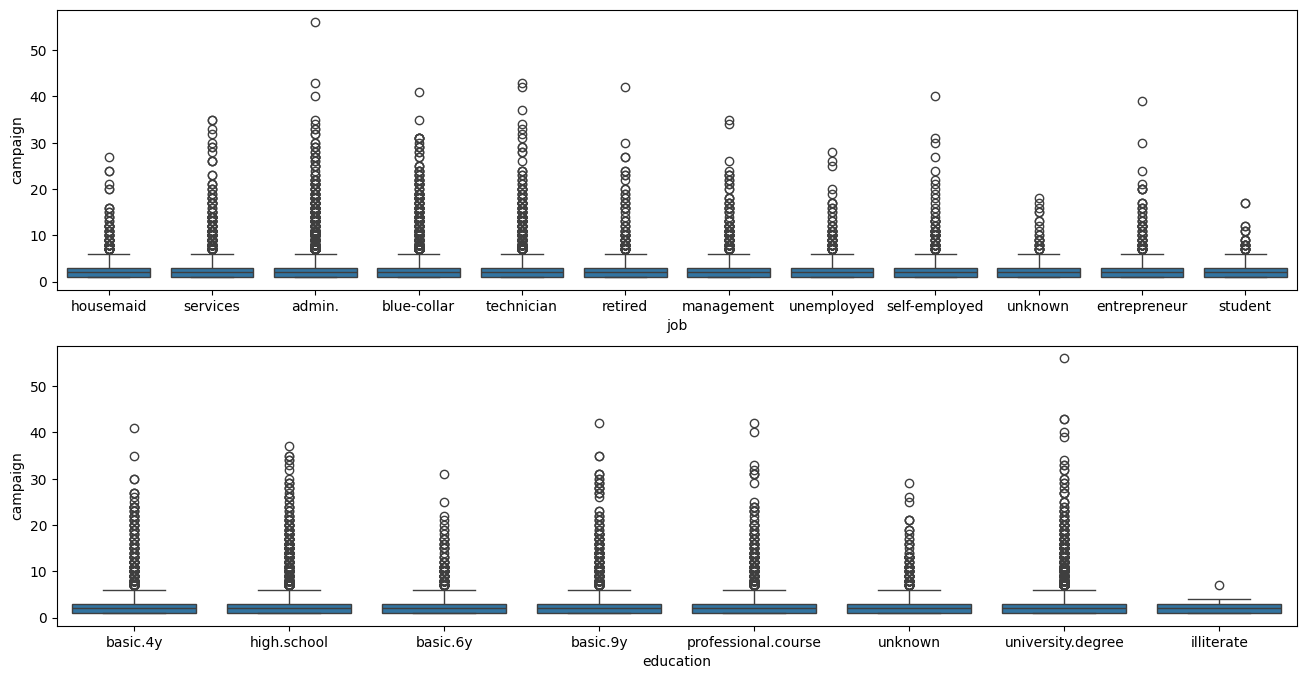

In [60]:
# Boxplots de campaign por educación y empleo
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
sns.boxplot(x='job', y='campaign', data=df, ax=ax1)
sns.boxplot(x='education', y='campaign', data=df, ax=ax2)

<Axes: xlabel='y', ylabel='campaign'>

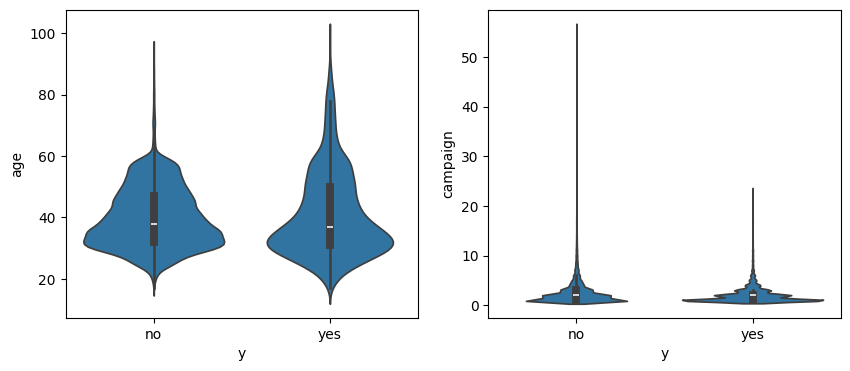

In [51]:
# Violin plots de variable objetivo vs edad y empleo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.violinplot(x='y', y='age', data=df, ax=ax1)
sns.violinplot(x='y', y='campaign', data=df, ax=ax2)

## Conclusiones

Con estas visualizaciones, buscamos comprender mejor las relaciones entre las variables y obtener información relevante para la construcción del modelo. Se destacan las siguientes conclusiones preliminares (incluir conclusiones).